In [1]:
import os 
import pandas as pd
import numpy as np

os.chdir("/home/t326h379/OGP")


df_negative = pd.read_csv('Feature_Extraction_O_linked_Training_Negative_114307_Sites_less.txt',header=None)
df_positive = pd.read_csv('Feature_Extraction_O_linked_Training_Positive_4885_Sites_less.txt',header=None)

Header_name = ["Position","PID","Position_redundant","81 Window sequence","S or T"]

col_of_feature = [i for i in range(1,1025)]

Header_name = Header_name + col_of_feature

In [3]:
import imblearn
import random
a = random.sample(range(1, 1000000), 100)

df_positive.columns = Header_name
df_negative.columns = Header_name


frames = [df_positive, df_negative]

O_linked_training = pd.concat(frames,ignore_index = True)

df_Train_array = O_linked_training.drop(["Position","PID","Position_redundant","81 Window sequence","S or T"],axis=1)
df_Train_array = np.array(df_Train_array)

X_train_full = df_Train_array

y_train_full = np.array([1]*4885+[0]*114144)

In [5]:
X_train_full.shape

(119029, 1024)

In [4]:
y_train_full.shape

(119029,)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

In [11]:
seed = a[0]
rus = RandomUnderSampler(random_state = seed)
X_train, y_train = rus.fit_resample(X_train_full,y_train_full)
X_train, y_train = shuffle(X_train,y_train)

In [34]:
seed

477785

In [12]:
X_train.shape

(9770, 1024)

In [13]:
y_train.shape

(9770,)

# TSNE plot of ProT5 Features only

/home/t326h379/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


477785


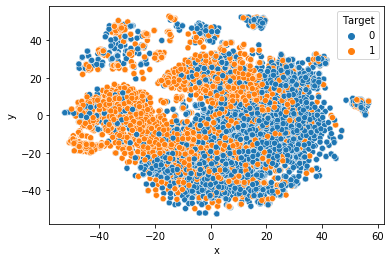

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline


df = pd.DataFrame()
df['Target'] = y_train

df['Target'].value_counts()

m = TSNE(learning_rate = 50)
tsne_features = m.fit_transform(X_train)
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]
sns.scatterplot(x="x",y="y",hue='Target',data=df)
filename = "TSNE_of_O_linked_Glycosylation_Training_Data_"+str(seed)+".png"
plt.savefig(filename,dpi=350,bbox_inches='tight')
print(seed)
plt.show()
print("\n\n\n")

# TSNE plot of latent features genterated by ANN model from Penultimate hidden layer

In [19]:
import tensorflow as tf
model_MLP = tf.keras.models.load_model('Prot_T5_my_model_O_linked_Glycosylation370381Prot_T5_Subash_Salman_Neha.h5')

In [20]:
from tensorflow.keras.models import Model

In [22]:
model_MLP.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_132 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_133 (Dropout)        (None, 256)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_134 (Dropout)        (None, 32)                0         
_________________________________________________________________
Dense_2 (Dense)              (None, 2)               

In [28]:
intermediate_layer_model = Model(inputs=model_MLP.input, outputs=model_MLP.get_layer(index=4).output)

In [29]:
intermediate_layer_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 1024)]            0         
_________________________________________________________________
dense_88 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_132 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_133 (Dropout)        (None, 256)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                8224      
Total params: 664,352
Trainable params: 664,352
Non-trainable params: 0
________________________________________________

In [30]:
intermediate_output = intermediate_layer_model.predict(X_train)

In [31]:
intermediate_output.shape

(9770, 32)

In [32]:
intermediate_output

array([[0.        , 2.5601127 , 3.127304  , ..., 2.7232833 , 2.8297076 ,
        0.        ],
       [0.15934074, 0.0100462 , 0.21563247, ..., 0.06021839, 0.14870748,
        0.11208884],
       [0.        , 0.6832071 , 0.760564  , ..., 0.587977  , 0.7499853 ,
        0.        ],
       ...,
       [0.43404776, 0.        , 0.        , ..., 0.        , 0.        ,
        0.53213525],
       [0.2786828 , 0.69829756, 0.6511182 , ..., 0.75456136, 0.58178663,
        0.01764271],
       [0.53367233, 0.        , 0.        , ..., 0.        , 0.        ,
        0.61881626]], dtype=float32)

/home/t326h379/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


477785


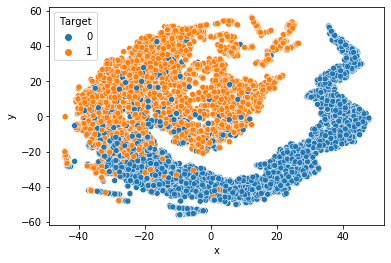

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline


df = pd.DataFrame()
df['Target'] = y_train

df['Target'].value_counts()

m = TSNE(learning_rate = 50)
tsne_features = m.fit_transform(intermediate_output)
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]
sns.scatterplot(x="x",y="y",hue='Target',data=df)
filename = "TSNE_of_O_linked_Glycosylation_Training_Data_from_Penultimate_layer_of_MLP"+str(seed)+".png"
plt.savefig(filename,dpi=350,bbox_inches='tight')
print(seed)
plt.show()
print("\n\n\n")

# Thank You